In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load Dataset

In [40]:
airline = pd.read_csv('flight_data.csv')
airline.head(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,47250,5/19/2005,1/11/2007,Male,4,NaN,NaN,CN,70.0,3/31/2014,...,550.0,4041,11/8/2013,145,112.500000,223,0,1.023163,3798,0
1,48079,3/9/2008,3/9/2008,Male,4,nanning,guangxi,CN,42.0,3/31/2014,...,5087.0,11667,10/18/2013,166,51.125000,122,0,0.945560,10087,0
2,29328,9/21/2005,9/21/2005,Female,4,shamen,fujian,CN,36.0,3/31/2014,...,0.0,3522,9/22/2012,557,1.333333,3,0,0.739438,2470,0
3,6694,4/7/2012,4/7/2012,Male,4,fanyu,guangdong,CN,53.0,3/31/2014,...,12672.0,40226,1/2/2014,90,21.166667,81,1,0.751670,27136,1
4,48496,3/4/2009,3/6/2009,Male,4,guangzhou,guangdong,CN,33.0,3/31/2014,...,7517.0,19102,12/28/2013,95,28.727273,104,3,0.847735,14036,3


# Data Understanding

In [41]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          1000 non-null   int64  
 1   FFP_DATE           1000 non-null   object 
 2   FIRST_FLIGHT_DATE  1000 non-null   object 
 3   GENDER             1000 non-null   object 
 4   FFP_TIER           1000 non-null   int64  
 5   WORK_CITY          970 non-null    object 
 6   WORK_PROVINCE      949 non-null    object 
 7   WORK_COUNTRY       1000 non-null   object 
 8   AGE                991 non-null    float64
 9   LOAD_TIME          1000 non-null   object 
 10  FLIGHT_COUNT       1000 non-null   int64  
 11  BP_SUM             1000 non-null   int64  
 12  SUM_YR_1           991 non-null    float64
 13  SUM_YR_2           997 non-null    float64
 14  SEG_KM_SUM         1000 non-null   int64  
 15  LAST_FLIGHT_DATE   1000 non-null   object 
 16  LAST_TO_END        1000 n

**Insight**
terdapat kesalahan data yang seharusnya
1. Fitur: `FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE`-> DateTime
2. Fitur: `Age` -> Integer

In [42]:
#melihat jumlah baris dan kolom
print("Total Baris dataset :", airline.shape[0])
print("Total Kolom dataset :", airline.shape[1])

Total Baris dataset : 1000
Total Kolom dataset : 23


## Missing Values Checking

In [43]:
#menghitung jumlah missing values
count = airline.isna().sum().sort_values(ascending = False)
percent = round(airline.isna().mean()*100,2).sort_values(ascending = False)

missing_values = pd.concat([count, percent], axis = 1, keys=["Count","Percent (%)"])
missing_values

,Count,Percent (%)
WORK_PROVINCE,51,5.1
WORK_CITY,30,3.0
AGE,9,0.9
SUM_YR_1,9,0.9
SUM_YR_2,3,0.3
MEMBER_NO,0,0.0
SEG_KM_SUM,0,0.0
Points_Sum,0,0.0
avg_discount,0,0.0
EXCHANGE_COUNT,0,0.0


In [44]:
#menghitung jumlah total missing value

airline_na_count= airline.shape[0] - airline.dropna().shape[0]
airline_na_percent = round((airline.shape[0] - airline.dropna().shape[0])/airline.shape[0]*100,2)
print("Jumlah Missing Value :", airline_na_count)
print("Jumlah Persentase Missing Value :",airline_na_percent,"%")

Jumlah Missing Value : 77
Jumlah Persentase Missing Value : 7.7 %


## Duplicate Checking

In [45]:
#melihat data duplikat
airline.duplicated().sum()

0

**Insight**

1. Jumlah baris dataset sebanyak 1000 dan kolom sebanyak 23
2. Terdapat missing values pada dataset sebanyak 77 data atau sebesar 7.7%
3. Dataset tidak terdapat data duplikat

# Exploratory Data Analyst

## Pengelompokan Data Berdasarkan Tipe Data

In [46]:
#mengelompokkan Fitur kategorikal dan Fitur numerik

cats = airline.select_dtypes(include="object").columns.tolist()
nums = airline.select_dtypes(exclude="object").columns.tolist()
print("Fitur Kategorikal :", cats)
print("Jumlah Fitur Kategorikal :", len(cats),"\n")
print("Fitur Numerical :", nums)
print("Jumlah Fitur Numerical :", len(nums),"\n")


Fitur Kategorikal : ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
Jumlah Fitur Kategorikal : 8 

Fitur Numerical : ['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
Jumlah Fitur Numerical : 15 



## Descriptive Statistic

In [47]:
#statistikal summary data numerikal
airline[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,1000.0,31911.558000,17550.505464,62.000000,16810.750000,32049.000000,46637.500000,62882.0
FFP_TIER,1000.0,4.104000,0.383838,4.000000,4.000000,4.000000,4.000000,6.0
AGE,991.0,42.207871,9.833625,17.000000,35.000000,41.000000,48.000000,78.0
FLIGHT_COUNT,1000.0,10.997000,12.224501,2.000000,3.000000,6.000000,13.000000,81.0
BP_SUM,1000.0,10424.021000,15723.882819,0.000000,2513.000000,5557.500000,12214.000000,185232.0
SUM_YR_1,991.0,4939.202825,7689.504475,0.000000,800.000000,2625.000000,5965.000000,107153.0
SUM_YR_2,997.0,5295.923771,8390.604514,0.000000,850.000000,2622.000000,6281.000000,93021.0
SEG_KM_SUM,1000.0,15684.910000,18283.504476,368.000000,4761.250000,9394.000000,19216.750000,163958.0
LAST_TO_END,1000.0,172.102000,185.449241,1.000000,28.000000,101.000000,254.500000,723.0
AVG_INTERVAL,1000.0,69.724757,84.203383,0.000000,23.000000,45.925824,83.000000,683.0


**Insight**

1. Mayoritas Fitur memiliki nilai Mean > Median menandakan fitur cenderung positive skew
2. Pada Fitur `MEMBER_NO, FFP_TIER, avg_discount` memiliki Mean dan Median hampir sama menandakan fitur cenderung berdistribusi normal
3. Terdapat nilai 0 pada fitur `BP_SUM, SUM_YR_1, SUM_YR_2, AVG_INTERVAL, MAX_INTERVAL, EXCHANGE_COUNT, avg_discount, Points_Sum, Point_NotFlight`

In [48]:
#stastikal summary data kategorikal
airline[cats].describe().T

,count,unique,top,freq
FFP_DATE,1000,790,1/13/2011,10
FIRST_FLIGHT_DATE,1000,832,11/6/2008,4
GENDER,1000,2,Male,779
WORK_CITY,970,222,beijing,137
WORK_PROVINCE,949,92,guangdong,269
WORK_COUNTRY,1000,16,CN,906
LOAD_TIME,1000,1,3/31/2014,1000
LAST_FLIGHT_DATE,1000,406,3/31/2014,14


In [49]:
gender_percent = round(48134/62985 *100, 2)
workcity_percent = round(9386/60719 *100, 2)
workprovince_percent = round(17509/59740 *100, 2)
workcountry_percent = round(57748/62962 *100, 2)

print("Jumlah % Male:", gender_percent)
print("Jumlah % Work City:", workcity_percent)
print("Jumlah % Work Province", workprovince_percent)
print("Jumlah % Work Country:", workcountry_percent)

Jumlah % Male: 76.42
Jumlah % Work City: 15.46
Jumlah % Work Province 29.31
Jumlah % Work Country: 91.72


In [50]:
#melihat banyak value pada Fitur Kategorikal
for col in cats:
  print(f"Value pada {col} adalah")
  print(airline[col].value_counts(), "\n")
  print("==========================================")

Value pada FFP_DATE adalah
FFP_DATE
1/13/2011     10
5/1/2012       6
3/23/2010      4
9/14/2011      4
10/1/2012      3
              ..
10/7/2009      1
8/29/2011      1
12/30/2008     1
2/7/2005       1
1/16/2009      1
Name: count, Length: 790, dtype: int64 

Value pada FIRST_FLIGHT_DATE adalah
FIRST_FLIGHT_DATE
11/6/2008     4
10/8/2009     3
12/1/2011     3
4/13/2012     3
8/20/2012     3
             ..
10/7/2009     1
11/7/2011     1
12/30/2008    1
5/22/2007     1
2/8/2009      1
Name: count, Length: 832, dtype: int64 

Value pada GENDER adalah
GENDER
Male      779
Female    221
Name: count, dtype: int64 

Value pada WORK_CITY adalah
WORK_CITY
beijing        137
guangzhou      133
shanghai        83
shenzhen        54
dalian          30
              ... 
wuchuan          1
lianyungang      1
KOBE-SHI         1
anshan           1
\                1
Name: count, Length: 222, dtype: int64 

Value pada WORK_PROVINCE adalah
WORK_PROVINCE
guangdong       269
beijing         139
sha

**Insight**

1. Mayoritas pengguna maskapai adalah laki-laki sebesar 76.42%
2. Mayoritas pengguna maskapai berasal dari kota Beijing sebesar 15.46%
3. Mayoritas pengguna maskapai berasal dari Provinsi Guangdong sebesar 29.31%
4. Mayoritas pengguna maskapai berasal Kode Negara CN sebesar 91.72%
5. Fitur `WORK_CITY, WORK_PROVINCE, WORK_COUNTRY` memiliki banyak unique value
6. Fitur: `FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE` seharusnya tipe datanya adalah DateTime

# Data Preprocessing

## Data Cleaning

In [51]:
airline.head(3)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,47250,5/19/2005,1/11/2007,Male,4,NaN,NaN,CN,70.0,3/31/2014,...,550.0,4041,11/8/2013,145,112.500000,223,0,1.023163,3798,0
1,48079,3/9/2008,3/9/2008,Male,4,nanning,guangxi,CN,42.0,3/31/2014,...,5087.0,11667,10/18/2013,166,51.125000,122,0,0.945560,10087,0
2,29328,9/21/2005,9/21/2005,Female,4,shamen,fujian,CN,36.0,3/31/2014,...,0.0,3522,9/22/2012,557,1.333333,3,0,0.739438,2470,0


1. Sebelum dilakukan data cleaning akan didrop terlebih dahulu untuk Fitur yang tidak digunakan `MEMBER_NO, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY` karena fitur tersebut tidak diperlukan
2. Fitur `Gender` juga akan didrop

In [52]:
#drop fitur
airline_pre = airline.copy()
airline_pre = airline.drop(["MEMBER_NO", "WORK_CITY", "WORK_PROVINCE", "WORK_COUNTRY", "GENDER"], axis= 1)
airline_pre.head(3)

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,5/19/2005,1/11/2007,4,70.0,3/31/2014,3,3798,5550.0,550.0,4041,11/8/2013,145,112.500000,223,0,1.023163,3798,0
1,3/9/2008,3/9/2008,4,42.0,3/31/2014,9,10087,5411.0,5087.0,11667,10/18/2013,166,51.125000,122,0,0.945560,10087,0
2,9/21/2005,9/21/2005,4,36.0,3/31/2014,4,2470,1599.0,0.0,3522,9/22/2012,557,1.333333,3,0,0.739438,2470,0


In [53]:
airline_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           1000 non-null   object 
 1   FIRST_FLIGHT_DATE  1000 non-null   object 
 2   FFP_TIER           1000 non-null   int64  
 3   AGE                991 non-null    float64
 4   LOAD_TIME          1000 non-null   object 
 5   FLIGHT_COUNT       1000 non-null   int64  
 6   BP_SUM             1000 non-null   int64  
 7   SUM_YR_1           991 non-null    float64
 8   SUM_YR_2           997 non-null    float64
 9   SEG_KM_SUM         1000 non-null   int64  
 10  LAST_FLIGHT_DATE   1000 non-null   object 
 11  LAST_TO_END        1000 non-null   int64  
 12  AVG_INTERVAL       1000 non-null   float64
 13  MAX_INTERVAL       1000 non-null   int64  
 14  EXCHANGE_COUNT     1000 non-null   int64  
 15  avg_discount       1000 non-null   float64
 16  Points_Sum         1000 n

### Missing Values Handling

In [54]:
#menghitung jumlah missing values
count = airline_pre.isna().sum().sort_values(ascending = False)
percent = round(airline_pre.isna().mean()*100,2).sort_values(ascending = False)

missing_values = pd.concat([count, percent], axis = 1, keys=["Count","Percent (%)"])
missing_values

,Count,Percent (%)
AGE,9,0.9
SUM_YR_1,9,0.9
SUM_YR_2,3,0.3
FFP_DATE,0,0.0
LAST_TO_END,0,0.0
Points_Sum,0,0.0
avg_discount,0,0.0
EXCHANGE_COUNT,0,0.0
MAX_INTERVAL,0,0.0
AVG_INTERVAL,0,0.0


In [55]:
#menghitung jumlah total missing value

airline_na_count= airline_pre.shape[0] - airline_pre.dropna().shape[0]
airline_na_percent = round((airline_pre.shape[0] - airline_pre.dropna().shape[0])/airline_pre.shape[0]*100,2)
print("Jumlah Missing Value :", airline_na_count)
print("Jumlah Persentase Missing Value :",airline_na_percent,"%")

Jumlah Missing Value : 21
Jumlah Persentase Missing Value : 2.1 %


**Insight**

Dikarenakan jumlah missing value dibawah 10% maka disini akan dilakukan drop

In [56]:
airline_clean = airline_pre.dropna().reset_index(drop=True)
airline_clean.head(3)

,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,5/19/2005,1/11/2007,4,70.0,3/31/2014,3,3798,5550.0,550.0,4041,11/8/2013,145,112.500000,223,0,1.023163,3798,0
1,3/9/2008,3/9/2008,4,42.0,3/31/2014,9,10087,5411.0,5087.0,11667,10/18/2013,166,51.125000,122,0,0.945560,10087,0
2,9/21/2005,9/21/2005,4,36.0,3/31/2014,4,2470,1599.0,0.0,3522,9/22/2012,557,1.333333,3,0,0.739438,2470,0


In [57]:
airline_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FFP_DATE           979 non-null    object 
 1   FIRST_FLIGHT_DATE  979 non-null    object 
 2   FFP_TIER           979 non-null    int64  
 3   AGE                979 non-null    float64
 4   LOAD_TIME          979 non-null    object 
 5   FLIGHT_COUNT       979 non-null    int64  
 6   BP_SUM             979 non-null    int64  
 7   SUM_YR_1           979 non-null    float64
 8   SUM_YR_2           979 non-null    float64
 9   SEG_KM_SUM         979 non-null    int64  
 10  LAST_FLIGHT_DATE   979 non-null    object 
 11  LAST_TO_END        979 non-null    int64  
 12  AVG_INTERVAL       979 non-null    float64
 13  MAX_INTERVAL       979 non-null    int64  
 14  EXCHANGE_COUNT     979 non-null    int64  
 15  avg_discount       979 non-null    float64
 16  Points_Sum         979 non

Jumlah data sekarang menjadi 979

## Change Data Types

Dikarenakan pada analisis sebelumnya terdapat tanggal 29/02/2014 sedangkan pada tahun 2014 bukan tahun kabisat maka data tanggal tersebut akan dihapus/drop

In [58]:
airline_last = airline.copy()

airline_last.drop(airline_last[airline_last["LAST_FLIGHT_DATE"].str.contains("2014/2/29")].index, inplace=True)

In [59]:
#drop data yang terdapat tanggal 2014/2/29
airline_clean.drop(airline_clean[airline_clean["LAST_FLIGHT_DATE"].str.contains("2014/2/29")].index, inplace=True)

Merubah data tanggal yang sebelumnya tipe data Object menjadi tipe data DateTime

In [60]:
#merubah data tanggal sebelumnya object menjadi dateTime
dates = ["FFP_DATE","FIRST_FLIGHT_DATE", "LOAD_TIME", "LAST_FLIGHT_DATE"]

for col in dates:
    airline_clean[col] = pd.to_datetime(airline_clean[col])

In [61]:
airline_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 0 to 978
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           976 non-null    datetime64[ns]
 1   FIRST_FLIGHT_DATE  976 non-null    datetime64[ns]
 2   FFP_TIER           976 non-null    int64         
 3   AGE                976 non-null    float64       
 4   LOAD_TIME          976 non-null    datetime64[ns]
 5   FLIGHT_COUNT       976 non-null    int64         
 6   BP_SUM             976 non-null    int64         
 7   SUM_YR_1           976 non-null    float64       
 8   SUM_YR_2           976 non-null    float64       
 9   SEG_KM_SUM         976 non-null    int64         
 10  LAST_FLIGHT_DATE   976 non-null    datetime64[ns]
 11  LAST_TO_END        976 non-null    int64         
 12  AVG_INTERVAL       976 non-null    float64       
 13  MAX_INTERVAL       976 non-null    int64         
 14  EXCHANGE_COUNT 

1. Fitur `FFP_DATE","FIRST_FLIGHT_DATE", "LOAD_TIME", "LAST_FLIGHT_DATE` sudah dikonversi menjadi tipe data DateTime
2. Jumlah Data sekarang sebesar 976

### Feature Selection

RFM merupakan model yang banyak digunakan dalam melakukan segmentasi. Model RFM ini terdiri dari Recency, Frequency dan Monetary. Disini untuk feature selection menggunakan LRFMC model, merupakan pengembangan dari RFM model. LRFMC pada kasus ini adalah: 

1. **L** (Length) : Lamanya waktu keanggotaan customer sejak pertama kali mendaftar sampai dengan periode observasi (semakin lama customer menjadi anggota berarti customer "loyal" atau semakin baik)

2. **R** (Recency) : Lamanya waktu antara customer melakukan penerbangan terakhir sampai periode observasi (semakin kecil artinya customer baru melakukan penerbangan oleh karena itu semakin kecil semakin baik)

3. **F** (Frequency): Jumlah penerbangan customer dalam periode observasi (semakin besar semakin baik yang artinya customer sering melakukan penerbangan)

4. **M** (Monetary) : Akumulasi jarak tempuh penerbangan selama periode observasi (semakin besar semakin baik yang artinya jarak tempuh yang jauh berarti tarif penerbangan semakin besar maka customer mengeluarkan lebih banyak uang)

5. **C** (Discount Coefficient) : Nilai rata-rata faktor diskon yang digunakan selama periode observasi (semakin kecil semakin baik yang artinya semakin sedikit customer menggunakan diskon dalam penerbangannya) 

Oleh karena itu pada kasus yang akan dilakukan analisis ini menggunakan fitur diantaranya adalah: 

- L : `LOAD_TIME` - `FFP_DATE` 

(Jumlah waktu Customer menjadi membership = Waktu terakhir observasi - Tanggal pertama customer mendaftar) dalam bentuk bulan

- R : `LAST_TO_END`
- F : `FLIGHT_COUNT`
- M : `SEG_KM_SUM`
- C : `avg_discount`

In [62]:
airline_LRFMC= airline_clean.copy()
airline_LRFMC= airline_LRFMC[["LOAD_TIME","FFP_DATE","LAST_TO_END","FLIGHT_COUNT","SEG_KM_SUM","avg_discount"]]
airline_LRFMC.head(3)

,LOAD_TIME,FFP_DATE,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2014-03-31,2005-05-19,145,3,4041,1.023163
1,2014-03-31,2008-03-09,166,9,11667,0.945560
2,2014-03-31,2005-09-21,557,4,3522,0.739438


### Data Transformation

In [63]:
airline_LRFMC["TIME_MONTH"] = ((airline_LRFMC["LOAD_TIME"] - airline_LRFMC['FFP_DATE']).dt.days/30).astype("int")
airline_LRFMC = airline_LRFMC[["TIME_MONTH","LAST_TO_END","FLIGHT_COUNT","SEG_KM_SUM","avg_discount"]].copy()

airline_LRFMC

,TIME_MONTH,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,107,145,3,4041,1.023163
1,73,166,9,11667,0.945560
2,103,557,4,3522,0.739438
3,24,90,31,40226,0.751670
4,61,95,23,19102,0.847735
...,...,...,...,...,...
974,22,148,2,3763,0.460361
975,83,322,3,5455,0.574519
976,75,11,23,32813,0.642341
977,54,25,28,33736,0.847301


## Outliers Handling

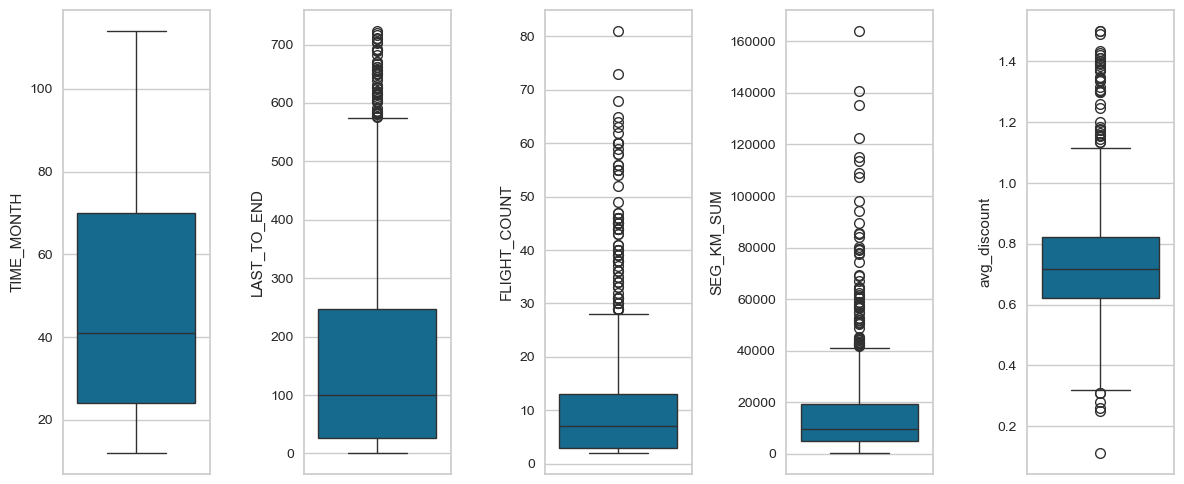

In [64]:
#melihat data outliers

column = airline_LRFMC.columns

plt.figure(figsize=(12,5))

for i in range(len(column)):
    plt.subplot(1, len(column), i+1)
    sns.boxplot(y = airline_LRFMC[column[i]])
plt.tight_layout()
plt.show()


**Observation**

1. Terdapat outlier pada Fitur `LAST_TO_END, FLIGHT_COUNT, SEG_KM_SUM, avg_discount`
2. Untuk penanganan outlier disini menggunakan Metode IQR (Interquartile Range) Tukey (1977). Inter Quartile Range (IQR) adalah salah satu prosedur yang paling banyak digunakan untuk mendeteksi dan menghilangkan pencilan (Outliers).

**Prosedur:**

- Temukan kuartil pertama, Q1.
- Temukan kuartil ketiga, Q3.
- Hitung IQR. IQR = Q3-Q1.
- Tentukan rentang data normal dengan batas bawah sebagai Q1 - 1,5 * IQR dan batas atas sebagai Q3 + 1,5 * IQR.

In [65]:
print(f'Jumlah baris sebelum memfilter outlier: {len(airline_LRFMC)}')
column = airline_LRFMC.columns
fil_ent = np.array([True] * len(airline_LRFMC))
for col in column:
    Q1 = airline_LRFMC[col].quantile(0.25)
    Q3 = airline_LRFMC[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((airline_LRFMC[col] >= low_limit) & (airline_LRFMC[col] <= high_limit)) & fil_ent
    
airline_LRFMC = airline_LRFMC[fil_ent].reset_index(drop=True)

print('Jumlah baris setelah memfilter outlier', len(airline_LRFMC))

Jumlah baris sebelum memfilter outlier: 976
Jumlah baris setelah memfilter outlier 794


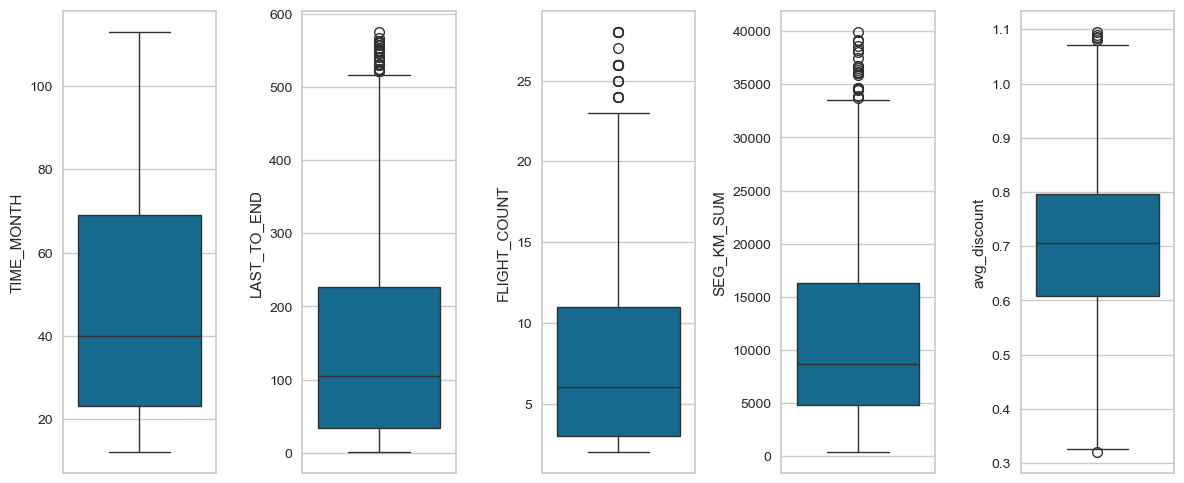

In [66]:
#melihat data outliers

column = airline_LRFMC.columns

plt.figure(figsize=(12,5))

for i in range(len(column)):
    plt.subplot(1, len(column), i+1)
    sns.boxplot(y = airline_LRFMC[column[i]])
plt.tight_layout()
plt.show()


Jumlah data setelah dilakukan outlier handling menjadi 794

## Standarization

In [67]:
airline_LRFMC.describe()

,TIME_MONTH,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
count,794.000000,794.000000,794.000000,794.000000,794.000000
mean,46.607053,153.759446,8.060453,11362.052897,0.703377
std,27.376673,150.619055,6.080699,8588.355987,0.150480
min,12.000000,1.000000,2.000000,368.000000,0.320497
25%,23.000000,33.250000,3.000000,4775.500000,0.608183
50%,40.000000,104.500000,6.000000,8659.500000,0.705553
75%,69.000000,227.000000,11.000000,16319.750000,0.797084
max,113.000000,575.000000,28.000000,39914.000000,1.094730


In [68]:
scaler = StandardScaler()
fitur = ["TIME_MONTH","LAST_TO_END","FLIGHT_COUNT","SEG_KM_SUM","avg_discount"]

X = airline_LRFMC[fitur]
X_std = scaler.fit_transform(X)
airline_LRFMC_std = pd.DataFrame(data = X_std, columns = fitur)
airline_LRFMC_std.head()

,TIME_MONTH,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2.207391,-0.058193,-0.832740,-0.852977,2.126449
1,0.964675,0.081320,0.154610,0.035529,1.610424
2,2.061189,2.678909,-0.668182,-0.913445,0.239793
3,0.526069,-0.390366,2.458428,0.901782,0.959928
4,0.672271,0.380275,-0.503623,-0.744506,-2.017613


In [69]:
# Menampilkan 5 baris pertama
print(airline_LRFMC_std.head())

   TIME_MONTH  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
0    2.207391    -0.058193     -0.832740   -0.852977      2.126449
1    0.964675     0.081320      0.154610    0.035529      1.610424
2    2.061189     2.678909     -0.668182   -0.913445      0.239793
3    0.526069    -0.390366      2.458428    0.901782      0.959928
4    0.672271     0.380275     -0.503623   -0.744506     -2.017613


In [70]:
airline_LRFMC_std.describe()

,TIME_MONTH,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
count,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02,7.940000e+02
mean,-3.803283e-17,-1.163357e-16,-8.948901e-18,-8.054011e-17,1.295353e-15
std,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00,1.000630e+00
min,-1.264904e+00,-1.014850e+00,-9.972987e-01,-1.280918e+00,-2.545996e+00
25%,-8.628489e-01,-8.005986e-01,-8.327403e-01,-7.674000e-01,-6.329988e-01
50%,-2.414909e-01,-3.272527e-01,-3.390650e-01,-3.148747e-01,1.447282e-02
75%,8.184728e-01,4.865700e-01,4.837272e-01,5.776218e-01,6.231194e-01
max,2.426694e+00,2.798491e+00,3.281220e+00,3.326591e+00,2.602346e+00


1. Data sudah dilakukan standarisasi dalam skala yang sama
2. Terlihat distribusi data cenderung skew kanan yang artinya distribusi cenderung positive skew (Mean > Median)

# Modeling

Modeling untuk segmentasi disini menggunakan metode **K-Mean Clustering** sebelum menentukan jumlah cluster yang optimal maka dilakukan analisis n-cluster menggunakan **Elbow Method**

In [71]:
list_inertia = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(airline_LRFMC_std.values)
    inertia_values = kmeans.inertia_
    list_inertia.append(inertia_values)
    print(f"cluster : {i} inertia value = {inertia_values}")

cluster : 2 inertia value = 2809.5036295546984
cluster : 3 inertia value = 2361.2661365353842
cluster : 4 inertia value = 2039.848413168543
cluster : 5 inertia value = 1730.2578309621226
cluster : 6 inertia value = 1556.2557134073143
cluster : 7 inertia value = 1442.6369188071899
cluster : 8 inertia value = 1312.53126580393
cluster : 9 inertia value = 1238.8150017756038
cluster : 10 inertia value = 1196.8711303522891


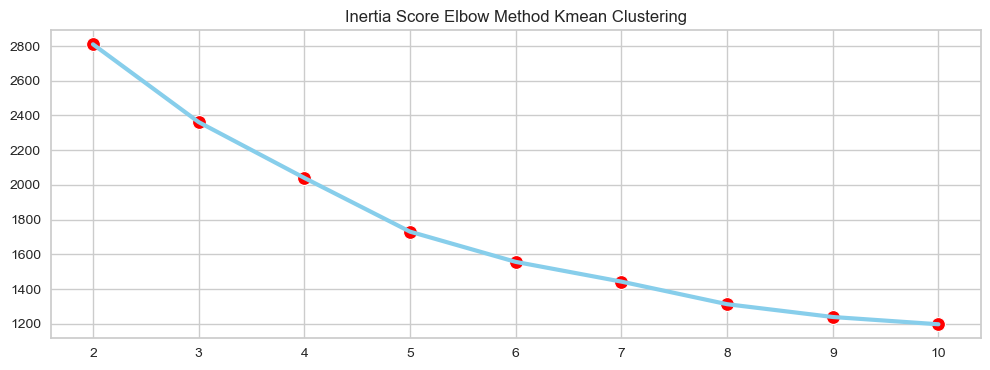

In [72]:
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(x=range(2, 11), y=list_inertia, color="skyblue", linewidth = 3)
sns.scatterplot(x=range(2, 11), y=list_inertia, s=100, color='red')
plt.title("Inertia Score Elbow Method Kmean Clustering")

plt.show()

Simulasi menggunakan Elbow Method tidak terlalu terlihat titik tajam patahan drop pointnya diantara angka 4 dan 6 

In [73]:
#!pip install yellowbrick

1.5


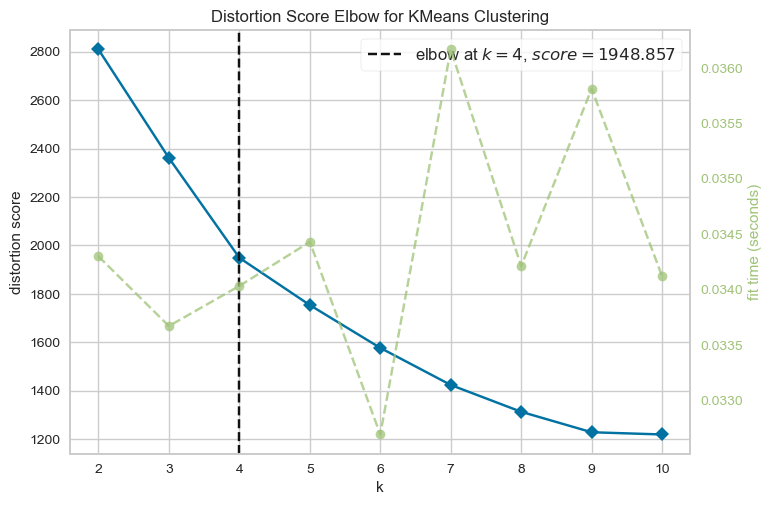

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
# visualisasi innertia vs k dengan parameter distortion
import yellowbrick
print(yellowbrick.__version__)

from yellowbrick.cluster import KElbowVisualizer

# fit model
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(airline_LRFMC_std.values)       
visualizer.show() 

Terlihat pada saat menggunakan KElbowVisualizer bahwa cluster yang optimal pada angka 4

# Evaluasi dan Visualisasi Menggunakan PCA

In [75]:
airline_LRFMC_std.info()
print(airline_LRFMC_std.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TIME_MONTH    794 non-null    float64
 1   LAST_TO_END   794 non-null    float64
 2   FLIGHT_COUNT  794 non-null    float64
 3   SEG_KM_SUM    794 non-null    float64
 4   avg_discount  794 non-null    float64
dtypes: float64(5)
memory usage: 31.1 KB
Index(['TIME_MONTH', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM',
       'avg_discount'],
      dtype='object')


Untuk Evaluasi dan Visualisasi disini menggunakan PCA dikarenakan terdapat 5 fitur atau 5 dimensi untuk memudah visualisasi masing-masing Cluster

## Simulasi menggunakan 4 Cluster

In [76]:
# airline_LRFMC_std = airline_LRFMC_std.drop("cluster", axis = 1)
from sklearn.cluster import KMeans
kmeans_4 = KMeans(n_clusters=4, random_state=0)
kmeans_4.fit(airline_LRFMC_std.values)


KMeans(n_clusters=4, random_state=0)

In [77]:
airline_LRFMC_std['cluster'] = kmeans_4.labels_

In [78]:
airline_LRFMC_std.head(3)

,TIME_MONTH,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount,cluster
0,2.207391,-0.058193,-0.832740,-0.852977,2.126449,2
1,0.964675,0.081320,0.154610,0.035529,1.610424,3
2,2.061189,2.678909,-0.668182,-0.913445,0.239793,2


In [79]:
pca = PCA(n_components=2)

pca.fit(airline_LRFMC_std)
pcs = pca.transform(airline_LRFMC_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = airline_LRFMC_std['cluster']
data_pca.head()

,PC 1,PC 2,clusters
0,-1.482561,-1.681695,2
1,-0.768362,-2.180489,3
2,-2.211903,0.065077,2
3,2.146186,-1.280741,1
4,0.033582,2.477171,0


In [80]:
display(airline_LRFMC_std.groupby('cluster').agg(['median','mean']))

TIME_MONTH           LAST_TO_END           FLIGHT_COUNT            \
            median      mean      median      mean       median      mean   
cluster                                                                     
0        -0.753198 -0.543177    0.220832  0.456130    -0.668182 -0.587209   
1        -0.259766 -0.110011   -0.788973 -0.636512     1.141961  1.298901   
2         1.220528  1.253811   -0.330574 -0.188946    -0.503623 -0.373999   
3        -0.643546 -0.466711    0.164363  0.405235    -0.503623 -0.488735   

        SEG_KM_SUM           avg_discount            
            median      mean       median      mean  
cluster                                              
0        -0.652463 -0.540585    -0.940468 -1.026525  
1         1.065945  1.270654     0.055457  0.147421  
2        -0.441230 -0.326528    -0.141795 -0.174486  
3        -0.605859 -0.542106     0.770713  0.920968

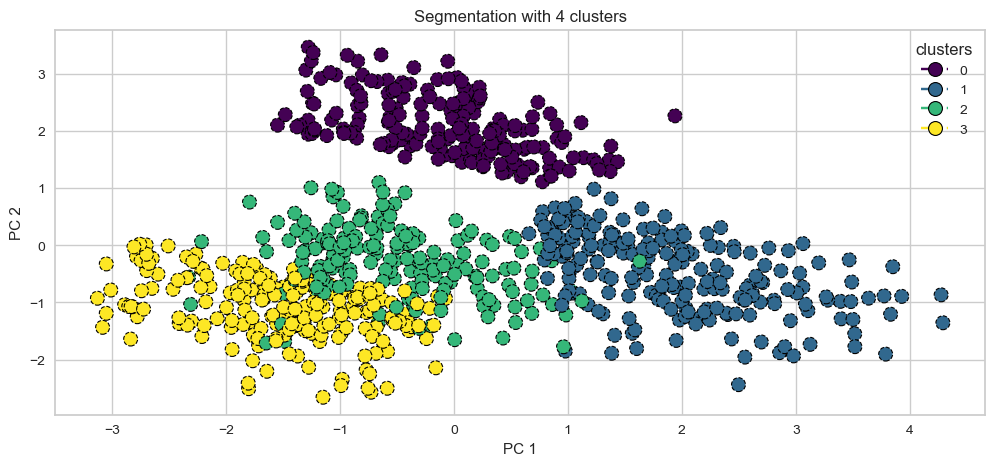

In [81]:
fig, ax = plt.subplots(figsize=(12,5))

sns.scatterplot( x="PC 1", y="PC 2", hue="clusters", data=data_pca, edgecolor='black', linestyle='--',
                palette='viridis', ax=ax, s = 100)
plt.title("Segmentation with 4 clusters")
plt.show()

Terlihat pada segmentasi menggunakan 4 cluster bahwa cluster belum terpisahkan cukup baik dengan adanya overlap pada masing-masing cluster

# Insight

### Jumlah Customer berdasarkan Cluster

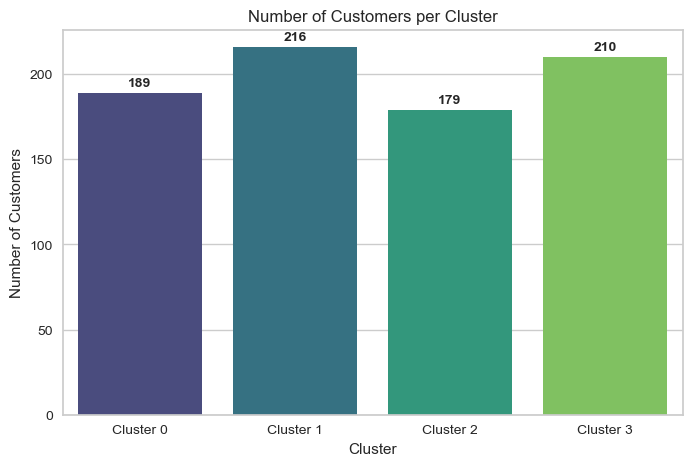

In [82]:
cluster_counts = airline_LRFMC_std['cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


for i, count in enumerate(cluster_counts.values):
    plt.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title("Number of Customers per Cluster")
plt.xticks(ticks=range(len(cluster_counts)), labels=[f"Cluster {i}" for i in cluster_counts.index])
plt.ylim(0, cluster_counts.max() + 10)  # Menyesuaikan ruang untuk teks di atas batang
plt.show()

**Observation**

Terlihat bahwa Customer mendominasi pada Cluster 1 dan Cluster 4

### Nilai LRFMC pada masing-masing Cluster

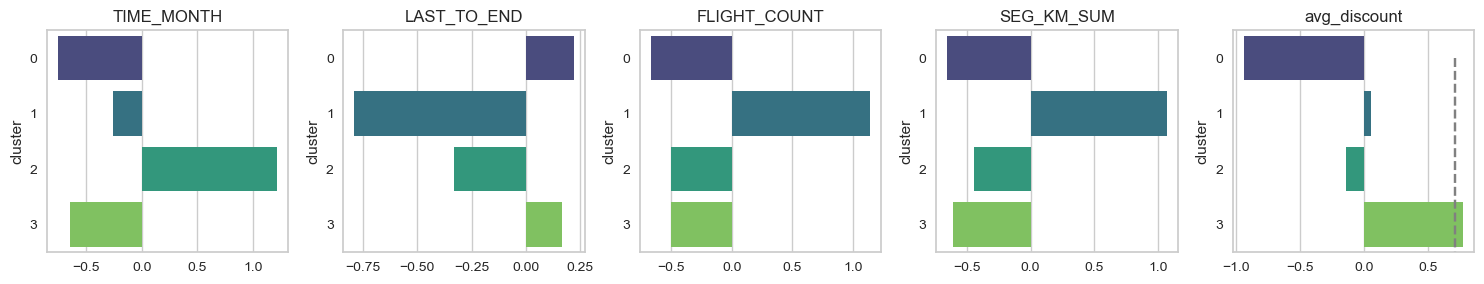

In [89]:
#melihat nilai LRFMC pada masing-masing cluster
column = ["TIME_MONTH", "LAST_TO_END", "FLIGHT_COUNT", "SEG_KM_SUM", "avg_discount"]

plt.figure(figsize=(15,3))
for i in range(len(column)):
    plt.subplot(1, len(column), i+1)
    plt.vlines(airline_LRFMC[column[i]].median(), ymin=0, ymax=4, color='grey', linestyle='--')
    group = airline_LRFMC_std.groupby('cluster')
    index = group[column[i]].median().index
    value = group[column[i]].median().values
    sns.barplot(y = index, x = value, orient='h', palette='viridis')
    plt.title(column[i])

plt.tight_layout()
plt.show()

### Hasil Observation

Terlihat masing-masing cluster terbentuk karena adanya perbedaan pada indikator model **LRFMC**. Berdasarkan analisis dan visualisasi diatas dapat disimpulkan bahwa: 

- **Cluster 0 - (Occasional Flyers)**:
Pelanggan yang sering terbang dalam jangka waktu terakhir, namun dengan jarak tempuh penerbangan yang pendek dan frekuensi yang rendah. Mereka jarang mendapatkan diskon, terlihat dari TIME_MONTH negatif, serta FLIGHT_COUNT dan avg_discount yang rendah.

- **Cluster 1 - (Frequent Flyers)**:
Pelanggan setia yang sering terbang dengan jarak tempuh jauh dan mendapatkan diskon moderat. Mereka memiliki frekuensi penerbangan tertinggi, terlihat dari FLIGHT_COUNT dan SEG_KM_SUM yang positif, dengan avg_discount mendekati rata-rata.

- **Cluster 2 - (Inactive Members)**:
Pelanggan yang jarang terbang dalam waktu terakhir dan memiliki jarak tempuh penerbangan yang pendek. Mereka cenderung tidak memanfaatkan diskon, terlihat dari TIME_MONTH tinggi dan avg_discount negatif

- **Cluster 3 - (Discount Seekers)**:
Pelanggan yang jarang terbang namun cenderung memanfaatkan diskon ketika melakukan perjalanan. Mereka memiliki avg_discount tertinggi, dengan FLIGHT_COUNT dan SEG_KM_SUM yang rendah.

### Business Recommendation

- **Cluster 0 -  (Occasional Flyers)** : 
    - Membangun dan menjaga hubungan baik dengan Customer
    - Memberikan potongan harga (discount) dengan mengajak teman untuk menggunakan Maskapai
    - Memberikan potongan harga (discount) untuk penerbangan selanjutnya
    - Memberikan point/reward untuk setiap pemesanan maskapai yang dapat direedem dengan voucher diskon atau produk 
- **Cluster 1 - (Frequent Flyers)** : 
    - Memberikan Ucapan "Terima Kasih" setiap customer menggunakan Maskapai dan Memberikan "Customer Greeting" serta memberikan voucher/discount untuk penerbangan berikutnya.
    - Memberikan point/reward untuk setiap pemesanan maskapai yang dapat direedem dengan voucher diskon atau produk afiliasi dengan maskapai.
    - Memberikan Merchandise dan pelayanan yang spesial kepada customer karena sudah melakukan frekuensi penerbangan tinggi afiliasi dengan maskapai.
- **Cluster 2 - (Inactive Member)** : 
    - Memberikan flyer campaign atau informasi terkait promo penerbangan
    - Memberikan newsletter kepada customer terkait discount dan program penerbangan dengan harapan customer untuk menggunakan maskapai kembali
- **Cluster 3 - (Discount Seekers)** : 
    - Memberikan flyer campaign atau informasi terkait promo penerbangan
    - Memberikan spesial promo/program penerbangan dengan batas waktu yang ditentukan 